<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/21pcs006_pradeep_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Libraries

In [5]:
import pandas as pd
import os

#### Task 1: Merging 12 months of sales data into a single csv file.

In [7]:
df = pd.read_csv("/content/drive/MyDrive/dataset/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
    
files = [file for file in os.listdir("/content/drive/MyDrive/dataset/SalesAnalysis")]

all_months_data = pd.DataFrame() #Creating empty dataframe called 'all_month_data'

for file in files:
    df = pd.read_csv("/content/drive/MyDrive/dataset/SalesAnalysis/Sales_DataSalesAnalysis.ipynb"+file)
    all_months_data = pd.concat([all_months_data, df]) #Merging to the previous empty dataframe

#Checking the result
all_months_data.to_csv("/content/drive/MyDrive/dataset/SalesAnalysis/Output/all_data.csv", index=False) #single csv file contain 12 months data.

FileNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Reading an updated dataframe

In [8]:
all_data=pd.read_csv("/content/drive/MyDrive/dataset/SalesAnalysis/Output/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Task 2: Add "Month" and "Sales" Column

In [9]:
#Removing Nan Values in our data
all_data=all_data.dropna(how='all')

#Removing rows based on condition, finding 'Or' and delete it
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#Add "Month" Column
all_data['Month'] = all_data['Order Date'].str[0:2] #Get the first 2 characters.
all_data['Month'] = all_data['Month'].astype('int32') #turning the data from string to integer

#Convert 'Quantity Ordered' and 'Price Each' to numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Becoming integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Becoming float

#Add "Sales" Column
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question 1: What was the best month for sales? How much was earned that month?

In [10]:
#all_data.groupby('Month').sum()

#### Importing Matplotlib

In [11]:
import matplotlib.pyplot as plt

#### Visualizing our results

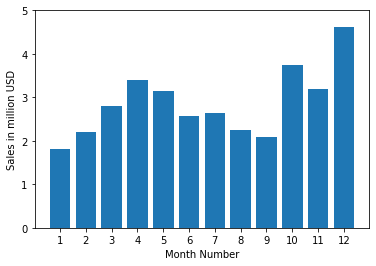

In [12]:
months = range(1,13) #For x axes
results = all_data.groupby('Month').sum()

plt.bar(months, results['Sales'])
plt.xticks(months)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #Scaling in million USD
plt.ylabel('Sales in million USD')
plt.xlabel('Month Number')
plt.show()

### Question 2: What city sold the most product?

#### Task 3: Add a "City" Column

In [13]:
#Function
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#Extract the city and the state
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [15]:
results2 = all_data.groupby('City').sum()
results2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


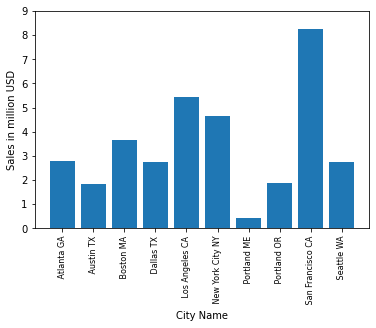

In [16]:
#We've already import the matplotlib

#Fixing the cities order
#cities = all_data['City'].unique()
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales'])
plt.xticks(cities, rotation='vertical', size = 8)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) #Scaling in million USD
plt.ylabel('Sales in million USD')
plt.xlabel('City Name')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### Task 4: Aggregate the period in 24-hours distribution

In [17]:
#Create new column in date-time Object (DTO)
all_data['Order_Date_DTO'] = pd.to_datetime(all_data['Order Date'])

#Extraction the hours data
all_data['Hour'] = all_data['Order_Date_DTO'].dt.hour

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_Date_DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9


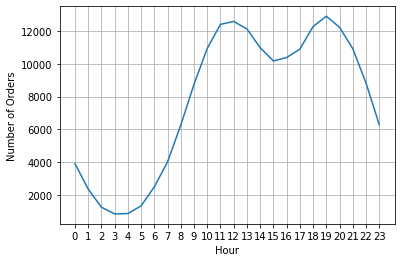

In [18]:
#Plotting
results3 = all_data.groupby(['Hour'])['Quantity Ordered'].count()
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, results3)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

#### Task 5: Make a new column called "Product Bundle"

In [19]:
#Make a new dataframe to seperate the duplicated values of Order ID
new_all = all_data[all_data['Order ID'].duplicated(keep=False)]

#Joining few products with the same Order ID into the same line.
new_all['Product_Bundle'] = new_all.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#Dropping the duplicate values
new_all = new_all[['Order ID','Product_Bundle']].drop_duplicates()

new_all.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product_Bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Task 6: Counting the Product bundles

In [20]:
#Importing libraries
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_all['Product_Bundle']:
    row_list = row.split(',')
    #count.update(Counter(combinations(row_list,2))) #Counting all the 2 products bundle
    count.update(Counter(combinations(row_list,3))) #Counting all the 3 products bundle
    
count.most_common(10)


[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

### Question 5: What Product sold the most? Why do you think it did?

#### Task 7: Grouping by the product

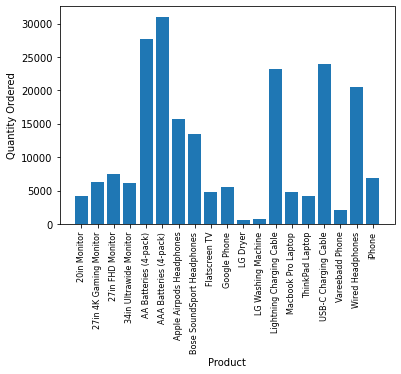

In [21]:
product_group = all_data.groupby('Product')

#Visualizing
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

#### Task 8: Overlaying a second y-axis on existing chart

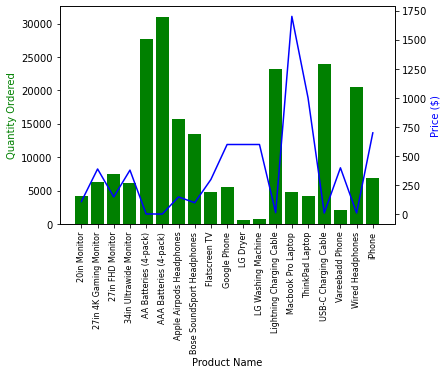

In [22]:
prices = all_data.groupby('Product').mean()['Price Each'] 

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()